In [1]:
#AUTHOR: Dylan Dorey
#DATE: 11/13/25
#COMMENTS: A comparison analysis between heuristic and gradient descent peception methods.

In [2]:
#Imports
import pandas
import numpy
import matplotlib.pyplot as plot

In [3]:
#Gather data from csv data file
data = pandas.read_csv("data.csv", header=None)
data.columns = ['x', 'y', 'z']
x = data['x'].values
y = data['y'].values
z = data['z'].values

X = numpy.column_stack((x, y))

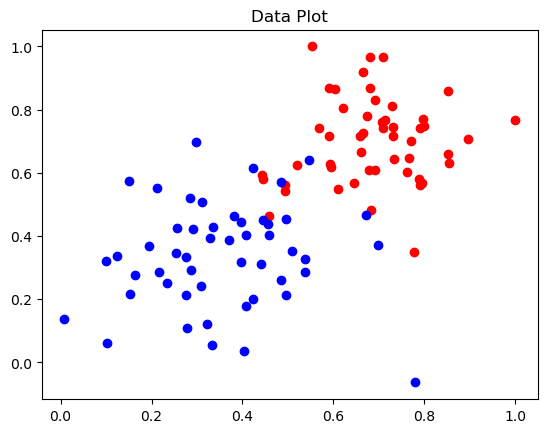

In [4]:
#Plot Data
plot.scatter(X[z==0,0], X[z==0,1], color='red')
plot.scatter(X[z==1,0], X[z==1,1], color='blue')
plot.title("Data Plot")
plot.show()

In [5]:
#Helper to plot decision lines
def PlotLine(graph, w, b, style, color, X=None):

    #force x range
    xVals = numpy.array([0, 1])

    yVals = -(w[0]*xVals + b)/w[1]

    #force y range
    yVals = numpy.clip(yVals, 0, 1)

    #plot values
    graph.plot(xVals, yVals, style, color=color)

Part 1: Heuristic Perception

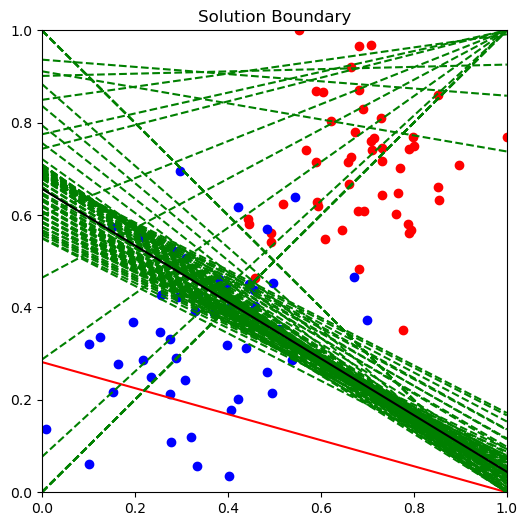

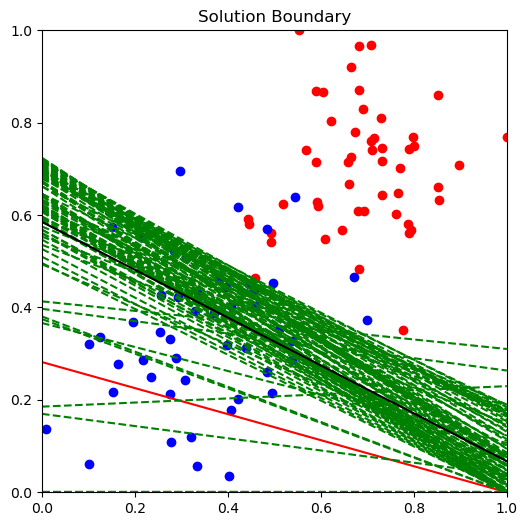

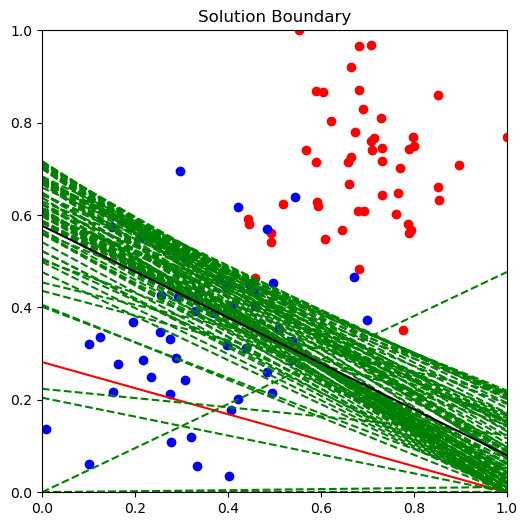

In [6]:
def PerceptronHeuristic(X, y, learningRate, epochs):
    #start a perceptron with random weights and bias
    numpy.random.seed(42)
    w = numpy.random.uniform(0, 1, X.shape[1])
    b = numpy.random.uniform(-1, 0)

    fig, graph = plot.subplots(figsize=(6,6))

    #scatter plot for data
    graph.scatter(X[y==0,0], X[y==0,1], color='red')
    graph.scatter(X[y==1,0], X[y==1,1], color='blue')

    #initial red line
    PlotLine(graph, w, b, '-', 'red', X)

    #training
    for epoch in range(epochs):
        for i in range(len(X)):
            z = numpy.dot(X[i], w) + b
            pred = 1 if z > 0 else 0

            #misclassified
            if pred != y[i]:
                if pred == 0:
                    b += learningRate
                    w += learningRate * X[i]
                else:
                    b -= learningRate
                    w -= learningRate * X[i]

        #subsequent green lines
        if epoch < epochs - 1:
            PlotLine(graph, w, b, '--', 'green', X)

    #final black line
    PlotLine(graph, w, b, '-', 'black', X)

    graph.set_title("Solution Boundary")
    graph.set_xlim(0, 1)
    graph.set_ylim(0, 1)
    plot.show()

    return w, b

#call heuristic function with custom learning rates and epochs
wh, bh = PerceptronHeuristic(X, z, 0.01, 100)
wh, bh = PerceptronHeuristic(X, z, 1, 100)
wh, bh = PerceptronHeuristic(X, z, 2, 100)

Part 1 Analysis

When the learning rate value for heuristic perception is changed, like in this case from 0.01, to 1, to 2, it controls how much weights are updated every iteration. We can see when the learning rate is less than 1, the learning is slow because the updates are smaller. When the learning rate is around 1, the updates are balanced and we can see learning is average, with mid range updates. However, if the updates are greater than 1, updates are massive and can be considered unstable. The heuristic method is great for discrete data sets, but does not perform well when data is noisy, proven by non consistent perception.

Part 2: Learning By Gradient Descent

In [7]:
def Sigmoid(z):
    return 1 / (1 + numpy.exp(-z))

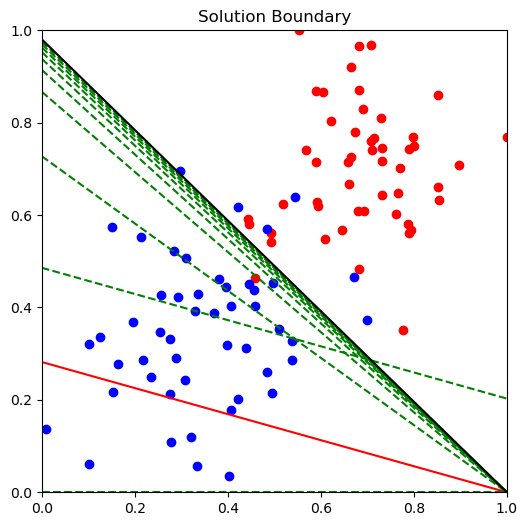

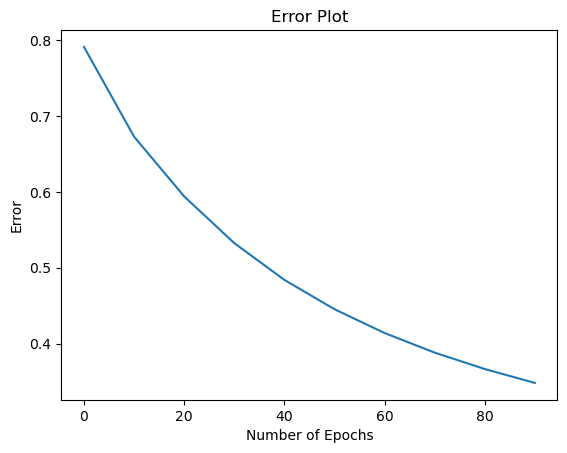

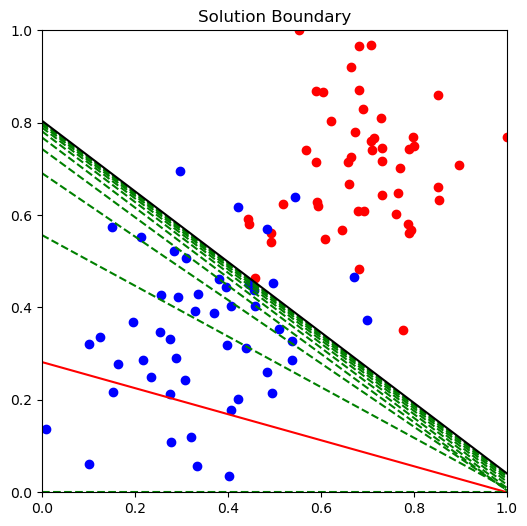

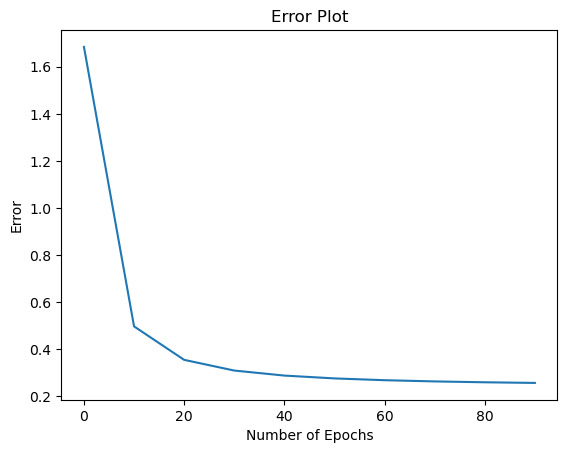

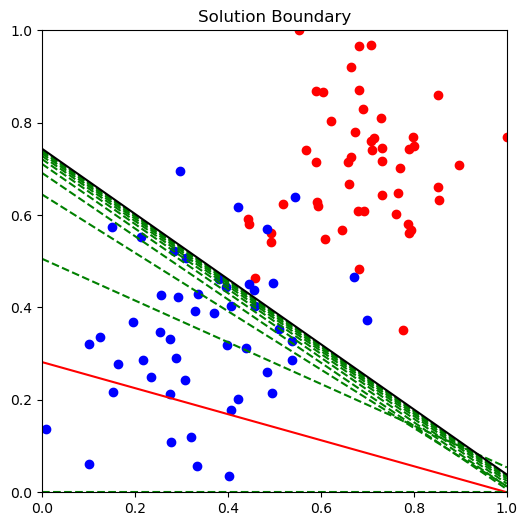

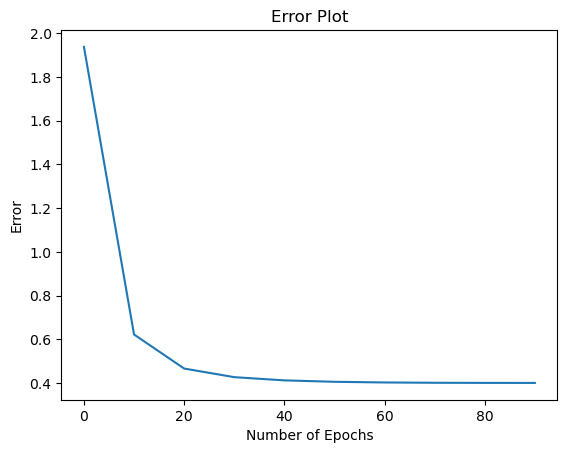

In [8]:
def PerceptronGradient(X, y, learningRate, epochs):
    #start a perceptron with random weights and bias
    numpy.random.seed(42)
    w = numpy.random.uniform(0, 1, X.shape[1])
    b = numpy.random.uniform(-1, 0)

    losses = []

    fig, graph = plot.subplots(figsize=(6,6))

    #scatter plot for data
    graph.scatter(X[y==0,0], X[y==0,1], color='red')
    graph.scatter(X[y==1,0], X[y==1,1], color='blue')

    #initial red line
    PlotLine(graph, w, b, '-', 'red', X)

    #training
    for epoch in range(epochs):
        for i in range(len(X)):
            z = numpy.dot(X[i], w) + b

            #compute prediction output
            yHat = Sigmoid(z)

            #compute error function 
            error = y[i] - yHat

            b += learningRate * error
            w += learningRate * error * X[i]

        #loss every 10 epochs
        if epoch % 10 == 0:
            yHatAll = Sigmoid(numpy.dot(X, w) + b)
            loss = -numpy.mean(y * numpy.log(yHatAll + 1e-8) + (1 - y) * numpy.log(1 - yHatAll + 1e-8))
            losses.append(loss)

            #subsequent green lines
            if epoch < epochs - 1:
                PlotLine(graph, w, b, '--', 'green', X)

    #final black line
    PlotLine(graph, w, b, '-', 'black', X)

    #gradient solution plot
    graph.set_title("Solution Boundary")
    graph.set_xlim(0, 1)
    graph.set_ylim(0, 1)
    plot.show()

    #loss curve plot
    plot.plot(numpy.arange(0, epochs, 10), losses)
    plot.title("Error Plot")
    plot.xlabel("Number of Epochs")
    plot.ylabel("Error")
    plot.show()

    return w, b

#call gradient function with custom learning rates and epochs
wg, bg = PerceptronGradient(X, z, 0.01, 100)
wg, bg = PerceptronGradient(X, z, 1, 100)
wg, bg = PerceptronGradient(X, z, 2, 100)

Part 2 Analysis

Gradient descent learning helps offer smoother learning. This behavior is demonstrated by the gradual decrease in error when analyzing data with increasing learning rates, up to 1. The error curve drops rapidly the close we bring the learing rate to 1. Compared to the heuristic method, gradient descent is more optimal because of its smoother learning and smoother decrease in error, as represented in the error graphs above. However, the gradient descent method should only be used on more complex data sets, due to it being more expensive computationally. The heuristic method excels when data is simple and an output is needed quickly.